In [64]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb
import sklearn

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [65]:
dataframe = pd.read_csv("petrol_consumption.csv")
dataframe.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


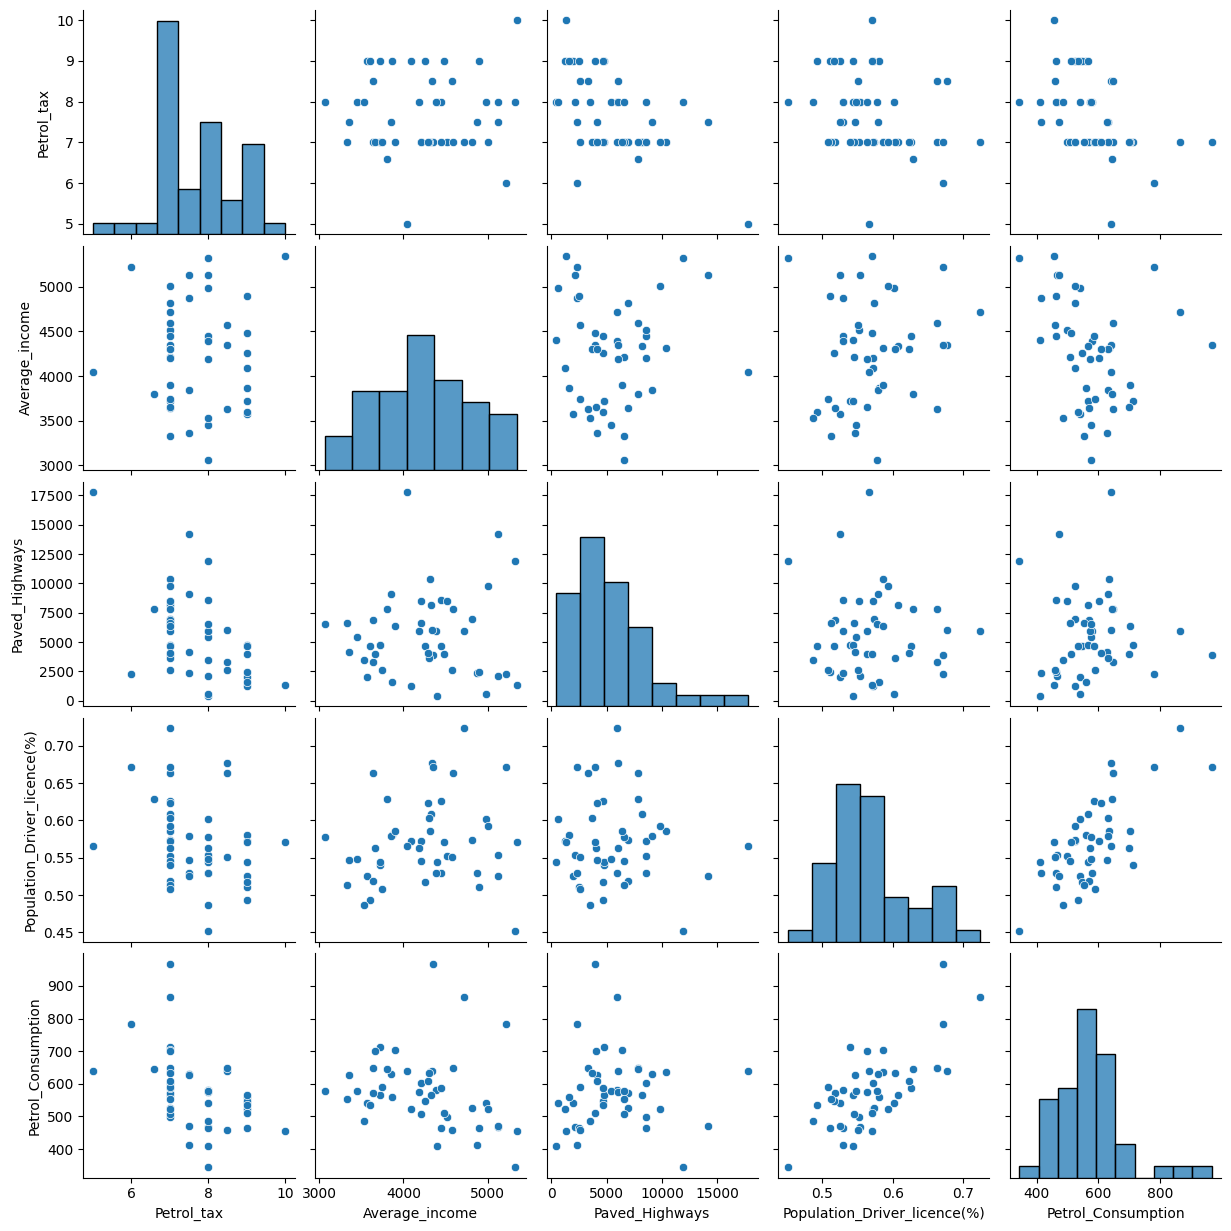

In [66]:
sb.pairplot(dataframe)

In [67]:
correlation = dataframe.corr()
correlation

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
Petrol_tax,1.000000,0.012665,-0.522130,-0.288037,-0.451280
Average_income,0.012665,1.000000,0.050163,0.157070,-0.244862
Paved_Highways,-0.522130,0.050163,1.000000,-0.064129,0.019042
Population_Driver_licence(%),-0.288037,0.157070,-0.064129,1.000000,0.698965
Petrol_Consumption,-0.451280,-0.244862,0.019042,0.698965,1.000000


<AxesSubplot: >

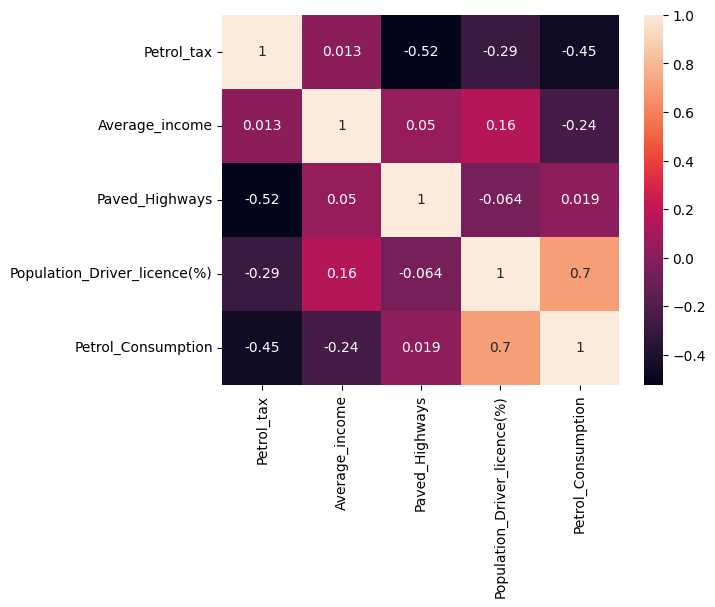

In [68]:
sb.heatmap(correlation, annot=True)

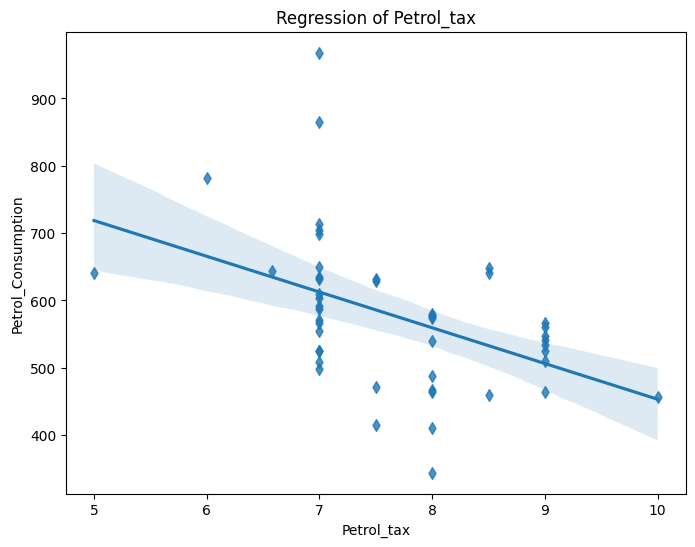

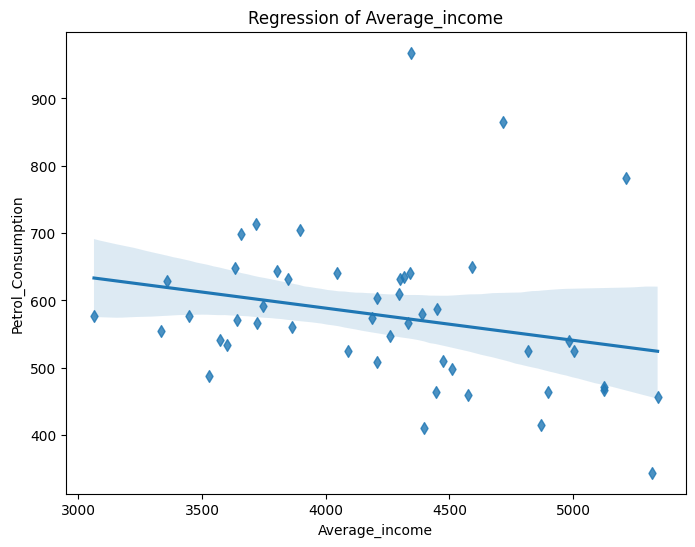

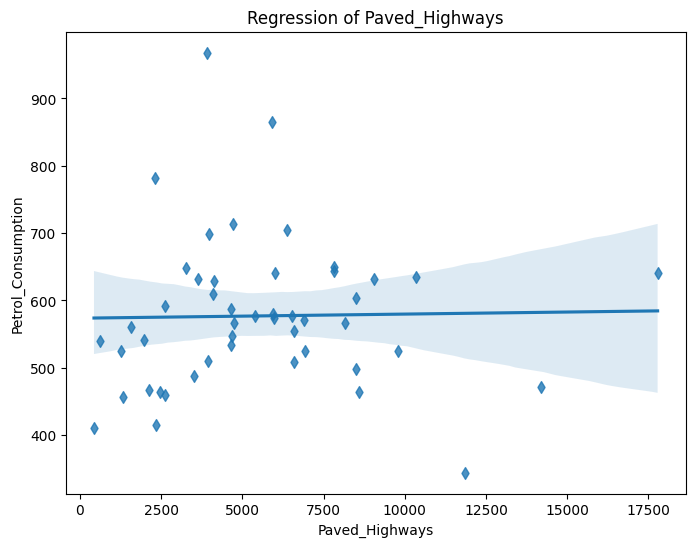

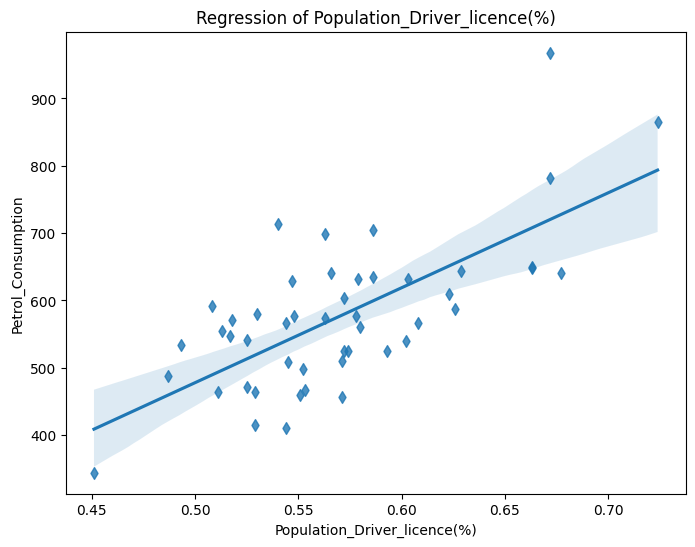

In [69]:
variables = ["Petrol_tax", "Average_income", "Paved_Highways", "Population_Driver_licence(%)"]

for var in variables:
    plt.figure(figsize=(8, 6), dpi=100)
    sb.regplot(x=var, y="Petrol_Consumption", data=dataframe, marker = "d").set(title=f"Regression of {var}")

# First Try: all variables

In [70]:
dataframe_data = dataframe[["Petrol_tax", "Average_income", "Paved_Highways", "Population_Driver_licence(%)"]].values
dataframe_target = dataframe[["Petrol_Consumption"]].values
dataframe_data_names = ["Petrol_tax", "Average_income", "Paved_Highways", "Population_Driver_licence(%)"]

x, y = scale(dataframe_data), dataframe_target

In [71]:
missing_values = x == np.NAN
x[missing_values == True] 

array([], dtype=float64)

In [72]:
LinReg = LinearRegression()
LinReg.fit(x, y)

LinearRegression()

In [73]:
print(f"Beta0: {LinReg.intercept_}, Beta1-4: {LinReg.coef_}")

Beta0: [576.77083333], Beta1-4: [[-32.7310515  -37.79691223  -8.3813148   73.3569154 ]]


In [74]:
print(f"score: {LinReg.score(x, y)}")

score: 0.6786867115698207


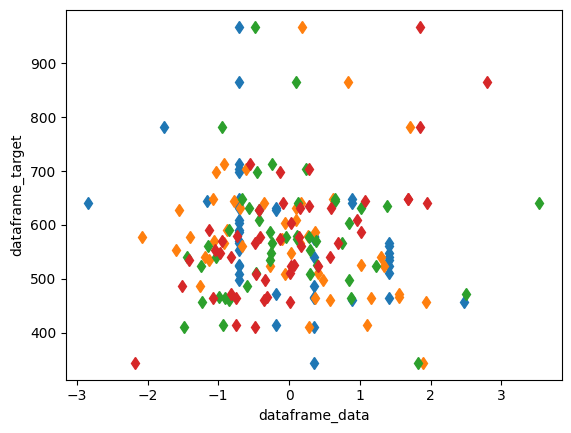

In [75]:
plt.plot(x, y, "d")
plt.xlabel("dataframe_data")
plt.ylabel("dataframe_target")
plt.show()

In [76]:
y_pred = LinReg.predict(x)
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

Mean absolute error: 48.78
Mean squared error: 3938.54
Root mean squared error: 62.76


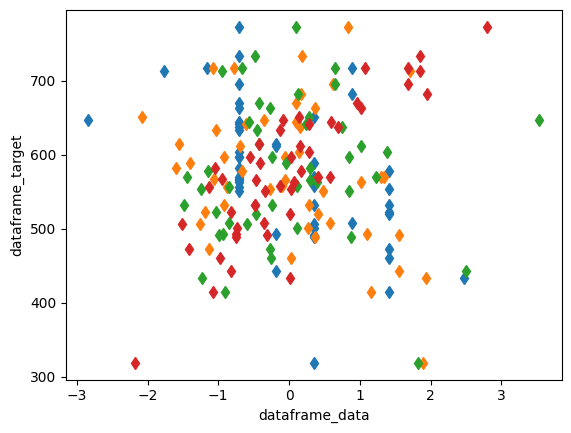

In [77]:
plt.plot(x, y_pred, "d")
plt.xlabel("dataframe_data")
plt.ylabel("dataframe_target")
plt.show()

# Second Try: only positive incline variables

In [78]:
test_data = dataframe[["Paved_Highways", "Population_Driver_licence(%)"]].values
test_target = dataframe[["Petrol_Consumption"]].values
test_data_names = ["Paved_Highways", "Population_Driver_licence(%)"]

x, y = scale(test_data), test_target

In [79]:
LinReg = LinearRegression()
LinReg.fit(x, y)

LinearRegression()

In [80]:
print(f"Beta0: {LinReg.intercept_}, Beta1-2: {LinReg.coef_}")

Beta0: [576.77083333], Beta1-2: [[ 7.10009976 77.84072613]]


In [81]:
print(f"score: {LinReg.score(x, y)}")

score: 0.49264840099718266


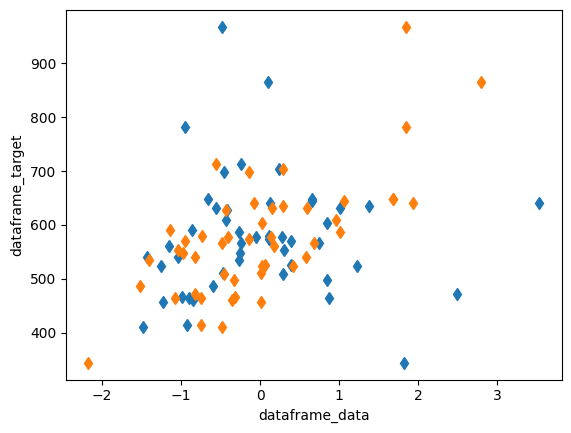

In [82]:
plt.plot(x, y, "d")
plt.xlabel("dataframe_data")
plt.ylabel("dataframe_target")
plt.show()

# Third Try: variables with least correlation (according to heatmap)

In [83]:
test2_data = dataframe[["Average_income", "Paved_Highways"]].values
test2_target = dataframe[["Petrol_Consumption"]].values
test2_data_names = ["Average_income", "Paved_Highways"]

x, y = scale(test2_data), test2_target

In [84]:
LinReg = LinearRegression()
LinReg.fit(x, y)

LinearRegression()

In [85]:
print(f"Beta0: {LinReg.intercept_}, Beta1-2: {LinReg.coef_}")

Beta0: [576.77083333], Beta1-2: [[-27.28411874   3.47686049]]


In [86]:
print(f"score: {LinReg.score(x, y)}")

score: 0.06094116063252053


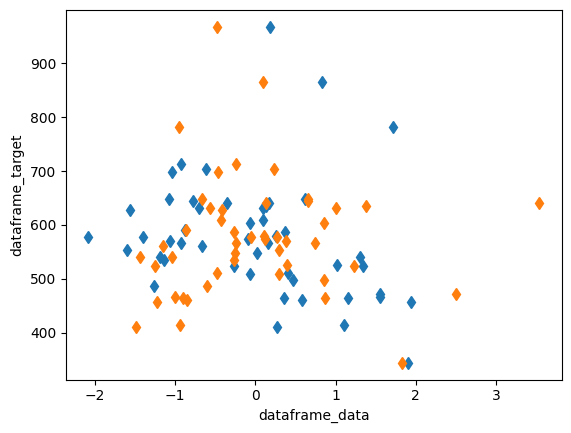

In [87]:
plt.plot(x, y, "d")
plt.xlabel("dataframe_data")
plt.ylabel("dataframe_target")
plt.show()

**Out of all 3 tries, the best score was in the first one with every varriable taken into account. Still, the score was far away from 1.0, but not close to 0. The model kinda works, but can be better with additional variables.**